# Pandas

In [5]:
import pandas as pd
import numpy as np

## Creating data

In [6]:
filename = './pandasData.csv'
with open(filename, "w") as f:
    f.write("x;y\n")
    x = np.random.normal(0, 2, 1000)
    y = np.random.normal(100, 10, 1000)
    for i in range(1000):
        line = "%d; %d \n" % (x[i], y[i])
        f.write(line)

## Getting data

In [7]:
data = pd.read_csv(filename, sep=';')
data.head(10)

,x,y
0,1,99
1,1,123
2,0,91
3,0,109
4,1,83
5,0,104
6,0,103
7,1,95
8,-4,100
9,0,108


## Queries and filter

In [8]:
data[data['y'] > 120]
data.query('y > 120')

,x,y
1,1,123
79,0,122
116,0,122
144,0,121
187,-1,124
200,0,127
257,0,123
296,-3,125
520,0,127
596,-1,122


In [9]:
data['y'].sum()

99459

In [10]:
data[:20]

,x,y
0,1,99
1,1,123
2,0,91
3,0,109
4,1,83
5,0,104
6,0,103
7,1,95
8,-4,100
9,0,108


## Pandas plot

In [11]:
data['y'].plot()


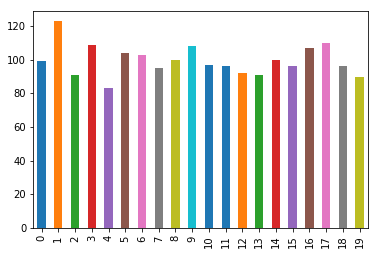

In [12]:
data[:20]['y'].plot(kind='bar')

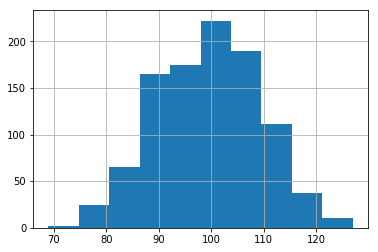

In [13]:
data['y'].hist()

# Data Manipulation with Pandas

In [14]:
# Default configuration for using auto completion with tab key
%config IPCompleter.greedy=True

In [15]:
import pandas
pandas.__version__

'0.22.0'

In [16]:
import pandas as pd 
# provides an efficient implementation of a DataFrame. DataFrames 
# multidimensional arrays with attached row and column labels

In [17]:
pd?

In [18]:
pd.*?

## The Pandas Series Object

In [19]:
import numpy as np

data = pd.Series([0.25, 0.5, 0.75, 1.0])
data

0    0.25
1    0.50
2    0.75
3    1.00
dtype: float64

In [20]:
data.values # NumPy array

array([0.25, 0.5 , 0.75, 1.  ])

In [21]:
data.index

RangeIndex(start=0, stop=4, step=1)

In [22]:
data[1] # like with NumPy

0.5

In [23]:
data[1:3]

1    0.50
2    0.75
dtype: float64

### Series as generalized NumPy array

In [24]:
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index=['a', 'b', 'c', 'd'])
data

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

In [25]:
data['b']

0.5

In [26]:
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index=[2, 5, 3, 7]) # non sequential indices
data

2    0.25
5    0.50
3    0.75
7    1.00
dtype: float64

### Series as specialized dictionary

In [27]:
population_dict = {'California': 38332521,
                   'Texas': 26448193,
                   'New York': 19651127,
                   'Florida': 19552860,
                   'Illinois': 12882135}
population = pd.Series(population_dict)
population

California    38332521
Florida       19552860
Illinois      12882135
New York      19651127
Texas         26448193
dtype: int64

In [28]:
population['California']

38332521

In [29]:
population['California':'Illinois'] # like indices

California    38332521
Florida       19552860
Illinois      12882135
dtype: int64

### Constructing Series objects

In [30]:
pd.Series([2, 4, 6])

0    2
1    4
2    6
dtype: int64

In [31]:
pd.Series(5, index=[100, 200, 300])

100    5
200    5
300    5
dtype: int64

In [32]:
pd.Series({2:'a', 1:'b', 3:'c'})


1    b
2    a
3    c
dtype: object

In [33]:
pd.Series({2:'a', 1:'b', 3:'c'}, index=[3, 2])

3    c
2    a
dtype: object

## The Pandas DataFrame Object

### DataFrame as a generalized NumPy array

If a *Series* is an analog of a one-dimensional array with flexible indices, a *DataFrame* is an analog of a two-dimensional array with both flexible row indices and flexible column names.

A *DataFrame* can be represented as a sequence of aligned *Series* objects

In [34]:
area_dict = {'California': 423967, 'Texas': 695662, 'New York': 141297,
             'Florida': 170312, 'Illinois': 149995}
area = pd.Series(area_dict)
area # new Series listing the area of each of the five states

California    423967
Florida       170312
Illinois      149995
New York      141297
Texas         695662
dtype: int64

In [35]:
states = pd.DataFrame({'population': population,
                       'area': area})
states # data frame which contains area and population of each state

,area,population
California,423967,38332521
Florida,170312,19552860
Illinois,149995,12882135
New York,141297,19651127
Texas,695662,26448193


In [36]:
states.index

Index(['California', 'Florida', 'Illinois', 'New York', 'Texas'], dtype='object')

In [37]:
states.columns

Index(['area', 'population'], dtype='object')

### DataFrame as specialized dictionary

In [38]:
states['area']

California    423967
Florida       170312
Illinois      149995
New York      141297
Texas         695662
Name: area, dtype: int64

### Constructing DataFrame objects
#### From a single Series object

In [39]:
pd.DataFrame(population, columns=['population'])

,population
California,38332521
Florida,19552860
Illinois,12882135
New York,19651127
Texas,26448193


#### From a list of dicts

In [40]:
data = [{'a': i, 'b': 2 * i}
        for i in range(3)]
pd.DataFrame(data)

,a,b
0,0,0
1,1,2
2,2,4


In [41]:
pd.DataFrame([{'a': 1, 'b': 2}, {'b': 3, 'c': 4}])

,a,b,c
0,1.0,2,NaN
1,NaN,3,4.0


#### From a dictionary of Series objects

In [42]:
pd.DataFrame({'population': population,
              'area': area})

,area,population
California,423967,38332521
Florida,170312,19552860
Illinois,149995,12882135
New York,141297,19651127
Texas,695662,26448193


#### From a two-dimensional NumPy array

In [43]:
pd.DataFrame(np.random.rand(3, 2),
             columns=['foo', 'bar'],
             index=['a', 'b', 'c'])

,foo,bar
a,0.795620,0.815341
b,0.055344,0.175796
c,0.190863,0.916420


#### From a NumPy structured array

In [44]:
A = np.zeros(3, dtype=[('A', 'i8'), ('B', 'f8')])
A

array([(0, 0.), (0, 0.), (0, 0.)], dtype=[('A', '<i8'), ('B', '<f8')])

In [45]:
pd.DataFrame(A)

,A,B
0,0,0.0
1,0,0.0
2,0,0.0


## The Pandas Index Object

In [46]:
ind = pd.Index([2, 3, 5, 7, 11])
ind

Int64Index([2, 3, 5, 7, 11], dtype='int64')

### Index as immutable array

In [47]:
ind[1] # Index as immutable array


3

In [48]:
ind[::2]

Int64Index([2, 5, 11], dtype='int64')

In [49]:
print(ind.size, ind.shape, ind.ndim, ind.dtype)

5 (5,) 1 int64


In [50]:
ind[1] = 0

TypeError: Index does not support mutable operations

### Index as ordered set

In [51]:
indA = pd.Index([1, 3, 5, 7, 9])
indB = pd.Index([2, 3, 5, 7, 11])

In [52]:
indA & indB  # intersection

Int64Index([3, 5, 7], dtype='int64')

In [53]:
indA | indB  # union

Int64Index([1, 2, 3, 5, 7, 9, 11], dtype='int64')

In [54]:
indA ^ indB  # symmetric difference

Int64Index([1, 2, 9, 11], dtype='int64')

## Data Indexing and Selection

### Data Selection in Series

#### Series as dictionary

In [55]:
import pandas as pd
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index=['a', 'b', 'c', 'd'])
data

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

In [56]:
data['b']

0.5

In [57]:
'a' in data # examine keys/indices and values

True

In [58]:
data.keys()

Index(['a', 'b', 'c', 'd'], dtype='object')

In [59]:
list(data.items())

[('a', 0.25), ('b', 0.5), ('c', 0.75), ('d', 1.0)]

In [60]:
data['e'] = 1.25
data

a    0.25
b    0.50
c    0.75
d    1.00
e    1.25
dtype: float64

#### Series as one-dimensional array

In [61]:
# slicing by explicit index
data['a':'c']

a    0.25
b    0.50
c    0.75
dtype: float64

In [62]:
# slicing by implicit integer index
data[0:2]

a    0.25
b    0.50
dtype: float64

In [63]:
# masking
data[(data > 0.3) & (data < 0.8)]

b    0.50
c    0.75
dtype: float64

In [64]:
# fancy indexing
data[['a', 'e']]

a    0.25
e    1.25
dtype: float64

#### Indexers: loc, iloc, and ix

In [117]:
data = pd.Series(['a', 'b', 'c'], index=[1, 3, 5])
data

1    a
3    b
5    c
dtype: object

In [118]:
# explicit index when indexing
data[1]

'a'

In [119]:
# implicit index when slicing
data[1:3]

3    b
5    c
dtype: object

In [120]:
data.loc[1]

'a'

In [121]:
# loc attribute allows indexing and slicing that always references the explicit index
data.loc[1:3]

1    a
3    b
dtype: object

In [122]:
data.iloc[1] # index value

'b'

In [123]:
#  iloc attribute allows indexing and slicing that always references the implicit Python-style index
data.iloc[1:3] # index location

3    b
5    c
dtype: object

In [124]:
data.iloc[0:2]

1    a
3    b
dtype: object

### Data Selection in DataFrame

#### DataFrame as a dictionary

In [125]:
area = pd.Series({'California': 423967, 'Texas': 695662,
                  'New York': 141297, 'Florida': 170312,
                  'Illinois': 149995})
pop = pd.Series({'California': 38332521, 'Texas': 26448193,
                 'New York': 19651127, 'Florida': 19552860,
                 'Illinois': 12882135})
data = pd.DataFrame({'area':area, 'pop':pop})
data

,area,pop
California,423967,38332521
Florida,170312,19552860
Illinois,149995,12882135
New York,141297,19651127
Texas,695662,26448193


In [126]:
data['area']

California    423967
Florida       170312
Illinois      149995
New York      141297
Texas         695662
Name: area, dtype: int64

In [127]:
data.area

California    423967
Florida       170312
Illinois      149995
New York      141297
Texas         695662
Name: area, dtype: int64

In [128]:
data.area is data['area']

True

In [129]:
data.pop is data['pop'] # like Pandas has pop function it does not work


False

In [130]:
data['density'] = data['pop'] / data['area']
data

,area,pop,density
California,423967,38332521,90.413926
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763
New York,141297,19651127,139.076746
Texas,695662,26448193,38.018740


#### DataFrame as two-dimensional array

In [131]:
data.values

array([[4.23967000e+05, 3.83325210e+07, 9.04139261e+01],
       [1.70312000e+05, 1.95528600e+07, 1.14806121e+02],
       [1.49995000e+05, 1.28821350e+07, 8.58837628e+01],
       [1.41297000e+05, 1.96511270e+07, 1.39076746e+02],
       [6.95662000e+05, 2.64481930e+07, 3.80187404e+01]])

In [132]:
data.T # swap rows and columns

,California,Florida,Illinois,New York,Texas
area,4.239670e+05,1.703120e+05,1.499950e+05,1.412970e+05,6.956620e+05
pop,3.833252e+07,1.955286e+07,1.288214e+07,1.965113e+07,2.644819e+07
density,9.041393e+01,1.148061e+02,8.588376e+01,1.390767e+02,3.801874e+01


In [133]:
data.values[0]

array([4.23967000e+05, 3.83325210e+07, 9.04139261e+01])

In [134]:
data['area']

California    423967
Florida       170312
Illinois      149995
New York      141297
Texas         695662
Name: area, dtype: int64

In [135]:
# first three row indices and first two cols indices
data.iloc[:3, :2] # using indices 


,area,pop
California,423967,38332521
Florida,170312,19552860
Illinois,149995,12882135


In [136]:
data.loc[:'Illinois', :'pop'] # using indices values

,area,pop
California,423967,38332521
Florida,170312,19552860
Illinois,149995,12882135


In [137]:
data.ix[:3, :'pop'] # hybrid approach using indices and indices values
# deprecated?

/home/jbuisine/.pyenv/versions/3.6.5/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


,area,pop
California,423967,38332521
Florida,170312,19552860
Illinois,149995,12882135


In [138]:
# loc indexer we can combine masking and fancy indexing as in the following
data.loc[data.density > 100, ['pop', 'density']]

,pop,density
Florida,19552860,114.806121
New York,19651127,139.076746


In [139]:
data.iloc[0, 2] = 90 # change value
data

,area,pop,density
California,423967,38332521,90.000000
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763
New York,141297,19651127,139.076746
Texas,695662,26448193,38.018740


#### Additional indexing conventions

In [140]:
# slices by row indices
data['Florida':'Illinois']

,area,pop,density
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


In [141]:
# slices can also refer to rows by number rather than by index
data[1:3]

,area,pop,density
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


In [142]:
data[data.density > 100] # masking

,area,pop,density
Florida,170312,19552860,114.806121
New York,141297,19651127,139.076746
